<a href="https://colab.research.google.com/github/Mustafamegahed20/ML_Tasks/blob/main/A2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression

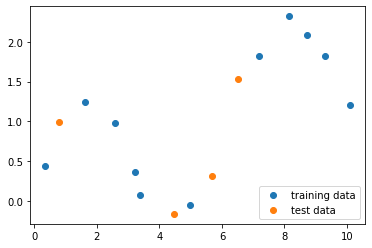

In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10



X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():
    
    result = []
    
    for i,degre in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degre , include_bias = True)
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        
        ###########    apply LinearRegression Model  ##################
        
        LinearRegressionModel = LinearRegression().fit(X_poly, y_train)
        
        ##########    prediction ############
        
        y_pred = LinearRegressionModel.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)));
        
        
        result.append(y_pred)
        
    # your answer here
    return result
y_pred= answer_one()
result = np.array(y_pred).shape
print(result)

(4, 100)


### Fitted model plot

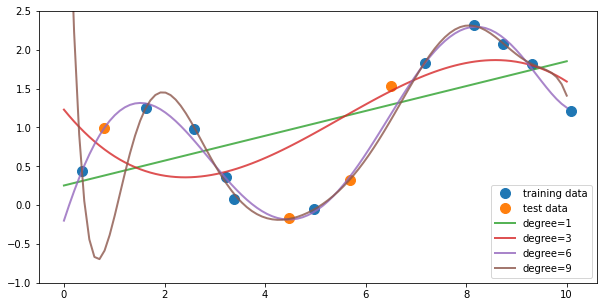

In [3]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above
underfitting in degree 1 , overfitting in degree 9

if we increase the number of degree ,overfitting was occured 

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [4]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.metrics.regression import r2_score
    
    r2_train = []
    r2_test = [] 
    
    for i in range(10):
        
        
        
        poly = PolynomialFeatures(degree=i )
        ##### train data ######
        
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        LinearRegressionModel = LinearRegression().fit(X_poly, y_train)
        r2_train.append(LinearRegressionModel.score(X_poly, y_train))

        ##### Test data ######
        X_poly_test = poly.fit_transform(X_test.reshape(-1,1))
        r2_test.append(LinearRegressionModel.score(X_poly_test, y_test))
#     print(np.array(r2_train).shape)
#     print(np.array(r2_test).shape)
        
    return (np.array(r2_train), np.array(r2_test))
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(0, 9, 6)

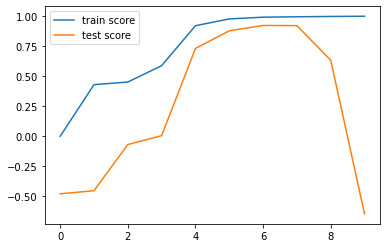

In [5]:
def answer_three():

    r2_scores = answer_two()
    fig, ax = plt.subplots(figsize=(6,4))
    
    ax.plot(r2_scores[0],  label='train score')
    ax.plot(r2_scores[1],  label='test score')
    ax.legend()
    
    df = pd.DataFrame({'training_score':r2_scores[0], 'test_score':r2_scores[1]})
    df['diff'] = df['training_score'] - df['test_score']
    
    df = df.sort_values(['diff'])
    good_gen = df.index[0]
    
    df = df.sort_values(['diff'], ascending = False)
    overfitting = df.index[0]
    
    df = df.sort_values(['training_score'])
    underfitting = df.index[0]
    
    return (underfitting,overfitting,good_gen)

answer_three()

## From the graph we can see that:

1) There is underfitting in >>>>> degrees 0,1,2 and 3.

2) There is overfitting in >>>>> degrees 8 and 9.

3) there is a good generalization performance in >>>>>> degrees 5,6 and 7 .

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

R2 is negative in linear regression. It means your model is no better than a constant. In other words, the model is utterly rubbish with linear regression with degree 12  and worse than do nothing,so that the model needs more data points 

R2 is positive in lasso due to Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss.

In [6]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
#     from sklearn.metrics import r2_score
    
    
    poly = PolynomialFeatures(degree=12)

    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
        
    ###########    apply LinearRegression Model  ##################    
    LinearRegressionModel = LinearRegression().fit(X_train_poly, y_train)
    
    LinearRegression_R2_test_score = LinearRegressionModel.score(X_test_poly, y_test)

    
    ###########    apply LassoRegression Model  ##################    
    
    LassoRegressionModel = Lasso(alpha=0.01,max_iter=10000).fit(X_train_poly,y_train)

    Lasso_R2_test_score = LassoRegressionModel.score(X_test_poly, y_test)
    

    return (LinearRegression_R2_test_score, Lasso_R2_test_score)
answer_four()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.311980555741178, 0.8406625614750356)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [ ]:
from sys import implementation
from sklearn.metrics import mean_squared_error

def mse(ytrue, yhat):
    error= np.square(np.subtract(Y_true,Y_pred)).mean()
    return error
Y_true = [1,1,2,2,4]
Y_pred=[0.8,1.56,1.23,2.3,3.8]
print("Sklearn_mean_squared_error :", mean_squared_error(Y_true,Y_pred))
print("my implementation :" ,mse(Y_true,Y_pred))

### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression,Ridge

class LinerregressionModel:

  def ordinaryLinearRegression(self,xtrain,ytrain):
        return LinearRegression().fit(xtrain, ytrain)
    
  def Ridge(self,alpha,max_iter,xtrain,ytrain):
        return Ridge(alpha=alpha, max_iter = max_iter).fit(xtrain, ytrain) 
        
  def lasso(self,alpha,max_iter,xtrain,ytrain):
        return Lasso(alpha=alpha, max_iter = max_iter).fit(xtrain, ytrain)
    
test = LinerregressionModel()
test.lasso(0.1,10000,X_train.reshape(-1,1),y_train.reshape(-1,1))
# Message #tasks-ml

Lasso(alpha=0.1, max_iter=10000)

### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [ ]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


     |████████████████████████████████| 119 kB 8.4 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=b754dc7556fd84e418388d3c5966c948c4f6df4165b067df1db4696e6be6075f
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=7ec635370eb3ff9e0f63ac5fd227474bc1e53b52e6079cd9d58b579ba86efd9e
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


In [ ]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

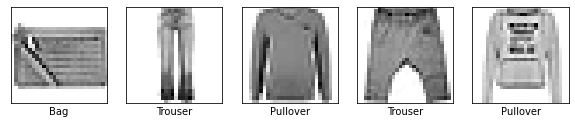

In [ ]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [ ]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train scores, ..., ClassifierN train scores], [Classifier1 test scores, ..., ClassifierN test scores]
    """
    # Evaluate with 3-fold cross-validation.
    train_scores=[]
    test_scores=[]
    for clf in classifiers:
        x_values=cross_validate(clf, X, y, cv=5,return_train_score=True)
        train_scores.append(x_values['train_score'])    
        test_scores.append(x_values['test_score'])
    return train_scores, test_scores
# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [ ]:
classifiers = [LogisticRegression(),KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)
evaluate_learners(classifiers, Xs, ys)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


([array([0.92178571, 0.91875   , 0.91821429, 0.91660714, 0.91339286]),
  array([0.86589286, 0.86321429, 0.865     , 0.86553571, 0.86517857])],
 [array([0.80142857, 0.80571429, 0.81428571, 0.81571429, 0.82714286]),
  array([0.81357143, 0.80071429, 0.80785714, 0.81428571, 0.81642857])])

Print train scores and test scores.

In [ ]:
print('Train Score Value : ', train_scores )
print('Test Score Value : ', test_scores )

Train Score Value :  [array([0.92178571, 0.91875   , 0.91821429, 0.91660714, 0.91339286]), array([0.86589286, 0.86321429, 0.865     , 0.86553571, 0.86517857])]
Test Score Value :  [array([0.80142857, 0.80571429, 0.81428571, 0.81571429, 0.82714286]), array([0.81357143, 0.80071429, 0.80785714, 0.81428571, 0.81642857])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

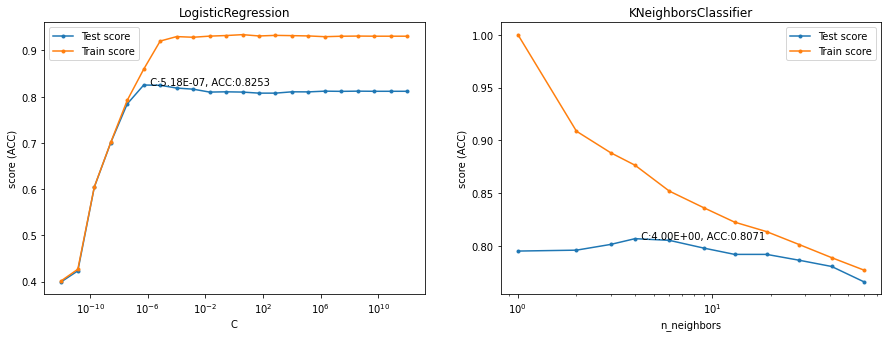

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)    

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

We find that Logistic regression underfits for small values of C, reaches an optimum around C=1e-7, and then starts overfitting. The kNN overfits for small numbers of neighbors, reaches an optimum around n_neighbors=4, and then starts underfitting gradually.


## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [ ]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [ ]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#### Code for calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

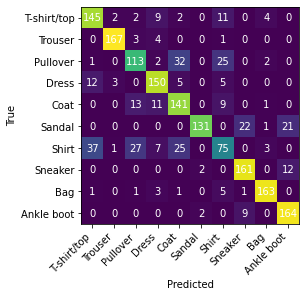

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 

In [ ]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


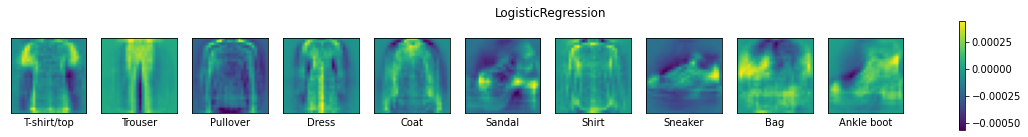

In [ ]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train))


**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**
#Why do you get multiple plots per model?
Very high values for weights (bright pixels in the images) or very low values (dark pixels in the images)
and plotting one model depend on these wieghts
#What do the features represent in your data. 
pixel of images
#Does it seems like the models pay attention to the right features?
yes ,the model will blow up the pixel values near the edges of the shirt, and especially near the shoulders
#Do you models seem to ignore certain features? 
yes, as we see above there is some feautures are ignored
#Do you observe differences in quality between the different classes?
yes,We see that some classes are less defined than others in these images, and these are typically the classes which are easily confused for other classes.


### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In the cell below replace the ####### with your trained models with different alphas.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


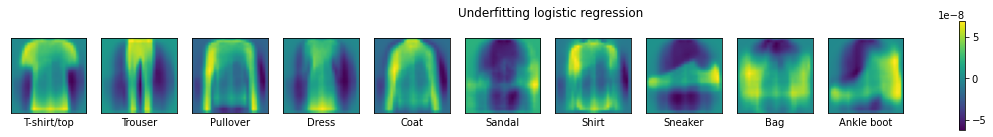

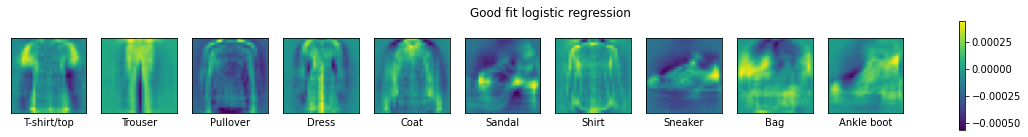

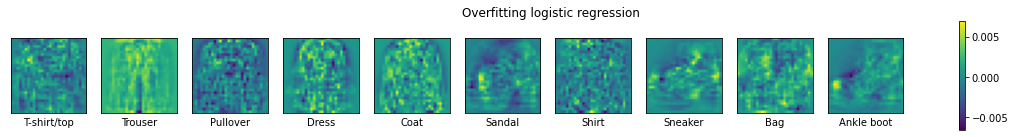

In [ ]:
plot_coefficients(LogisticRegression(C=1e-12).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e+10).fit(X_train,y_train),"Overfitting logistic regression")

**Answer:**
in first row bluring image due to underfitting (wieghts are poor)

in the second row the weights are goot enough to detect the features of images

in the third row due to overfitting ..there is more nosies in images so the wieghts not able to be detected 